In [1]:
import uproot
import os
import mplhep as hep
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from importer import nanoaod_to_dataframe, compare_cells, calculate_dr, find_closest_emb_particle, apply_dr_matching
import vector

plt.style.use(hep.style.CMS)

In [2]:
data_path = "../../data/2022G-nanoaod/2022G-data.root"
emb_path = "../../data/2022G-nanoaod/2022G-emb.root"

output_path = "../../output/diff_vs_distance/"

default_binning = True
relative = False
yscale_log = False

quantities = [
    {"key":"PuppiMET_sumEt",    "target":"PuppiMET_sumEt",  "expand":False,     "dr_matching":False},
    {"key":"PuppiMET_pt",       "target":"PuppiMET_pt",     "expand":False,     "dr_matching":False},
    {"key":"PuppiMET_phi",      "target":"PuppiMET_phi",    "expand":False,     "dr_matching":False},
    {"key":"Muon_phi",          "target":"phi",             "expand":True,      "dr_matching":True},
    {"key":"Muon_pt",           "target":"pt",              "expand":True,      "dr_matching":True},
    {"key":"Muon_eta",          "target":"eta",             "expand":True,      "dr_matching":True},
    {"key":"Muon_mass",         "target":"m",               "expand":True,      "dr_matching":True},
    {"key":"Jet_phi",           "target":"Jet_phi",         "expand":False,     "dr_matching":False},
    {"key":"Jet_pt",            "target":"Jet_pt",          "expand":False,     "dr_matching":False},
    {"key":"Jet_eta",           "target":"Jet_eta",         "expand":False,     "dr_matching":False},
    {"key":"Jet_mass",          "target":"Jet_mass",        "expand":False,     "dr_matching":False},
    {"key":"run",               "target":"run",             "expand":False,     "dr_matching":False},
    {"key":"luminosityBlock",   "target":"lumi",            "expand":False,     "dr_matching":False},
    {"key":"event",             "target":"event",           "expand":False,     "dr_matching":False}
]

data_df = nanoaod_to_dataframe(data_path=data_path, quantities=quantities)
emb_df = nanoaod_to_dataframe(data_path=emb_path, quantities=quantities)
print("Data loaded")

Data loaded


In [3]:

data_df = data_df.sort_values(by=["run", "lumi", "event"], ignore_index=True)
emb_df = emb_df.sort_values(by=["run", "lumi", "event"], ignore_index=True)

compare_cells(data_df["event"].values, emb_df["event"].values)
compare_cells(data_df["lumi"].values, emb_df["lumi"].values)
compare_cells(data_df["run"].values, emb_df["run"].values)

print("Data ok")

Data ok


In [4]:
dr = calculate_dr(data_df, emb_df, 2, 5)
index_1, dr_1 = find_closest_emb_particle(dr, particle_id=1)
# index_2, dr_2 = find_closest_emb_particle(dr, particle_id=2)

# emb_df = apply_dr_matching(data_df, emb_df, quantities)

(array([2.2805e+04, 4.1000e+01, 8.8000e+01, 1.1400e+02, 5.4400e+02,
        1.0290e+03, 2.3800e+02, 5.0000e+01, 1.8000e+01, 2.4000e+01]),
 array([0.        , 0.6282959 , 1.2565918 , 1.8848877 , 2.51318359,
        3.14147949, 3.76977539, 4.39807129, 5.02636719, 5.65466309,
        6.28295898]),
 <BarContainer object of 10 artists>)

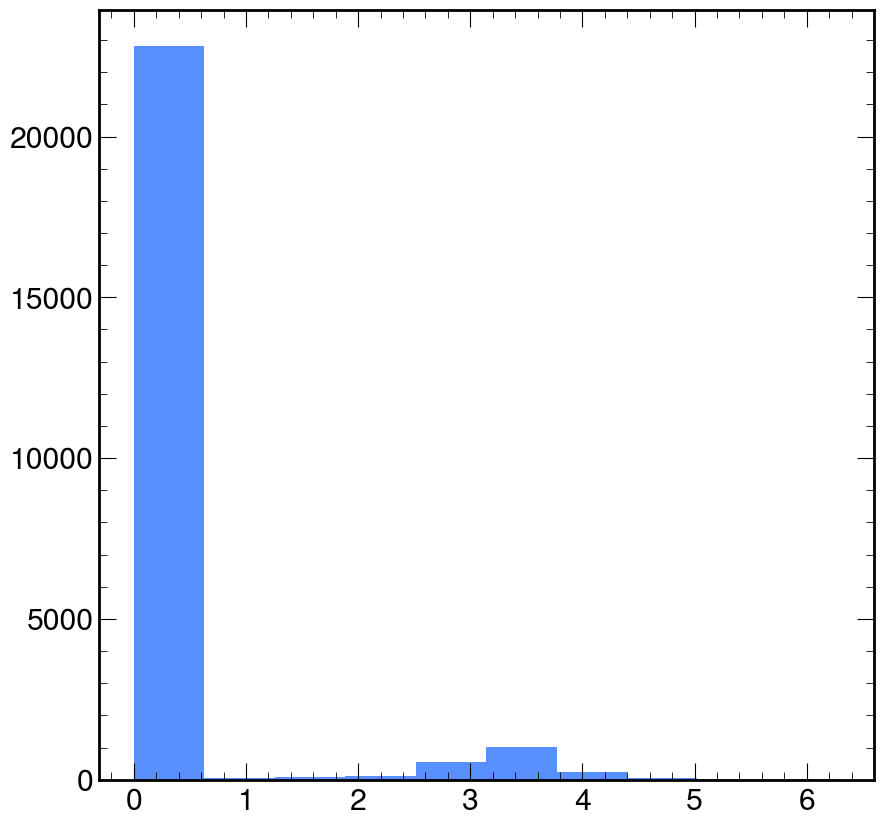

In [5]:
plt.hist(dr[:,0,0])

(array([1416., 3424., 3882., 3258., 2588., 1761., 1178.,  761.,  543.,
         395.,  228.,  207.,  164.,  128.,   87.,   85.,   71.,   66.,
          68.]),
 array([0.00000000e+00, 5.26315789e-05, 1.05263158e-04, 1.57894737e-04,
        2.10526316e-04, 2.63157895e-04, 3.15789474e-04, 3.68421053e-04,
        4.21052632e-04, 4.73684211e-04, 5.26315789e-04, 5.78947368e-04,
        6.31578947e-04, 6.84210526e-04, 7.36842105e-04, 7.89473684e-04,
        8.42105263e-04, 8.94736842e-04, 9.47368421e-04, 1.00000000e-03]),
 <BarContainer object of 19 artists>)

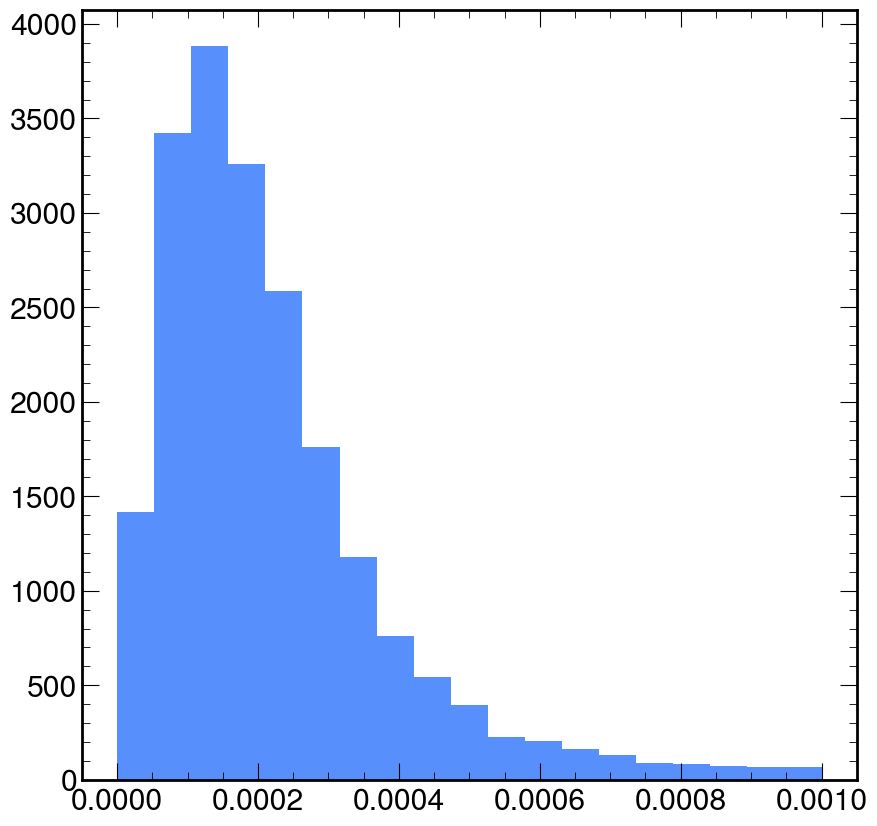

In [6]:
plt.hist(dr_1, bins=np.linspace(0,0.001,20))

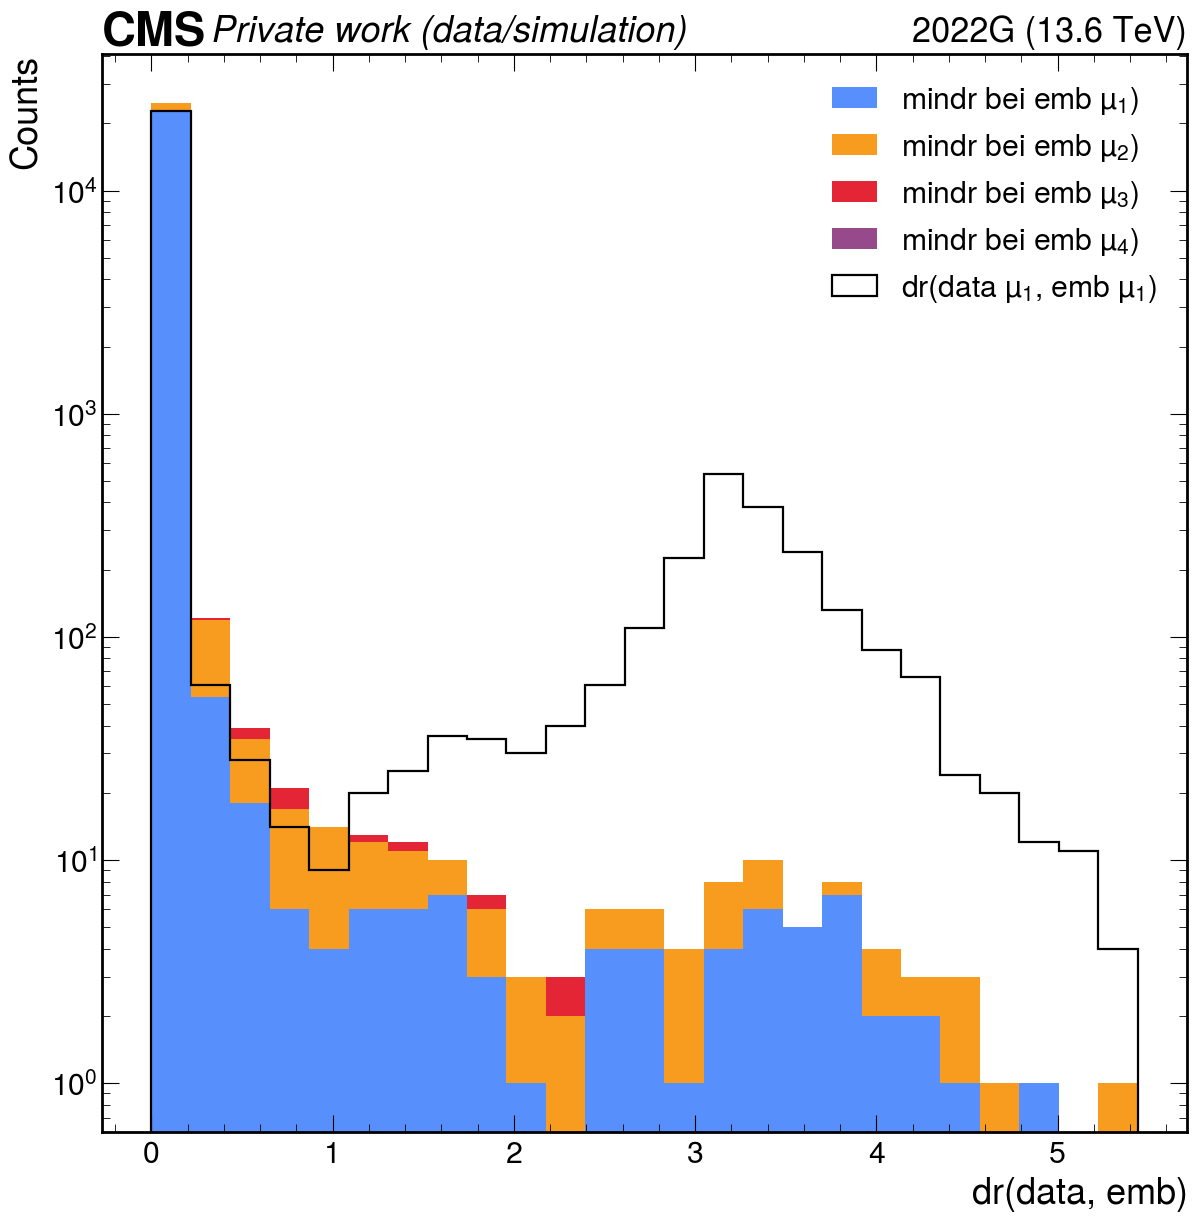

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(14)
fig.set_figwidth(14)

hist2, edges, _ = ax.hist([dr_1[index_1==num] for num in np.unique(index_1)], bins=25, label=[f"mindr bei emb $µ_{num} $)" for num in np.unique(index_1)], stacked=True)
hist, _, _ = ax.hist(dr[:,0,0], bins=edges, label=f"dr(data $µ_1$, emb $µ_{1}$)", histtype="step", color="black", linewidth=1.6)

hep.cms.label("Private work (data/simulation)", data=True, loc=0, year="2022G", com=13.6)#, lumi=59.8
ax.set_ylabel("Counts")
ax.set_xlabel(r"$dr(\text{data, emb})$")
ax.set_yscale("log")

plt.legend()
plt.show()



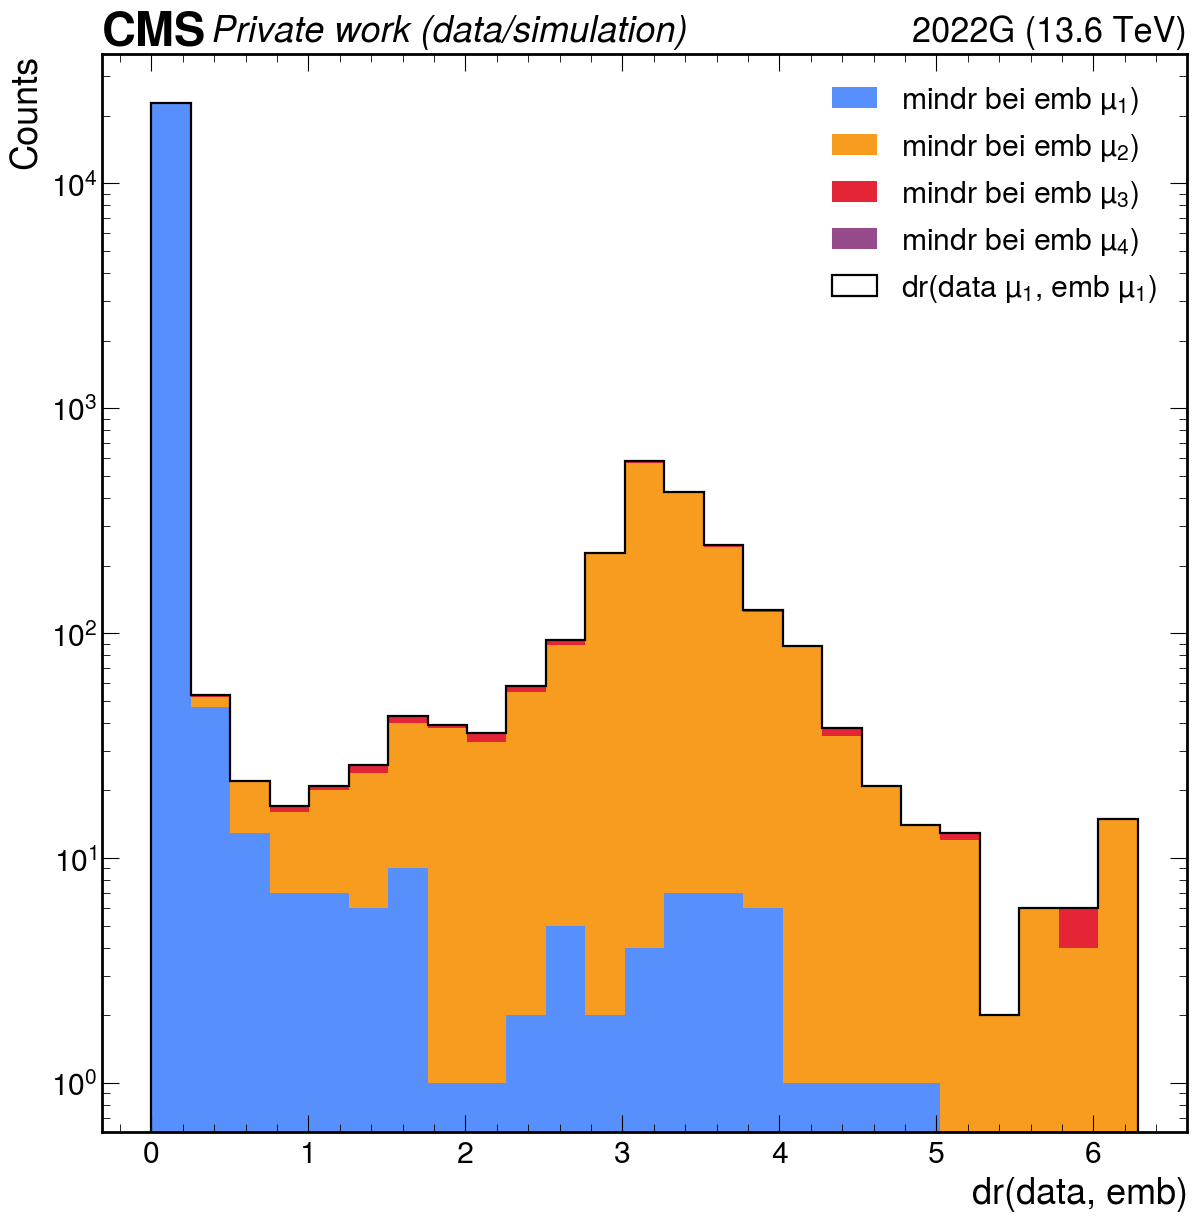

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(14)
fig.set_figwidth(14)

hist2, edges, _ = ax.hist([dr[index_1==num, 0,0] for num in np.unique(index_1)], bins=25, label=[f"mindr bei emb $µ_{num} $)" for num in np.unique(index_1)], stacked=True)
hist, _, _ = ax.hist(dr[:,0,0], bins=edges, label=f"dr(data $µ_1$, emb $µ_{1}$)", histtype="step", color="black", linewidth=1.6)

hep.cms.label("Private work (data/simulation)", data=True, loc=0, year="2022G", com=13.6)#, lumi=59.8
ax.set_ylabel("Counts")
ax.set_xlabel(r"$dr(\text{data, emb})$")
ax.set_yscale("log")

plt.legend()
plt.show()